In [ ]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
import pandas as pd
spotify_data = pd.read_csv('spotify_history.csv')

# Display the first few rows
spotify_data.head()


Saving spotify_history.csv to spotify_history.csv


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [ ]:
# Check data types and missing values
spotify_data.info()

# Summary statistics of numerical columns
spotify_data.describe()

# Check for missing values
missing_values = spotify_data.isnull().sum()
print("Missing Values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB
Missing Values:
 spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start 

In [ ]:
missing_values = spotify_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


In [ ]:
# Fill missing values using forward fill
spotify_data.fillna(method='ffill', inplace=True)


<ipython-input-5-fab1e436e12b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spotify_data.fillna(method='ffill', inplace=True)


In [ ]:
# Check for missing values in the specified columns
missing_values = spotify_data[['reason_start', 'reason_end']].isnull().sum()
print("Missing Values in reason_start and reason_end:\n", missing_values)


Missing Values in reason_start and reason_end:
 reason_start    0
reason_end      0
dtype: int64


In [ ]:
# Forward fill the missing values in the specified columns
spotify_data[['reason_start', 'reason_end']] = spotify_data[['reason_start', 'reason_end']].fillna(method='ffill')

# Check if missing values are filled
missing_values_after = spotify_data[['reason_start', 'reason_end']].isnull().sum()
print("Missing Values After Filling:\n", missing_values_after)


<ipython-input-7-30510fa6752c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spotify_data[['reason_start', 'reason_end']] = spotify_data[['reason_start', 'reason_end']].fillna(method='ffill')


Missing Values After Filling:
 reason_start    0
reason_end      0
dtype: int64


In [ ]:
# Convert timestamp column to datetime format
spotify_data['ts'] = pd.to_datetime(spotify_data['ts'], errors='coerce')

# Drop rows with missing values
spotify_data.dropna(inplace=True)

# Reset the index after cleaning
spotify_data.reset_index(drop=True, inplace=True)


In [ ]:
# Create new features
spotify_data['date'] = spotify_data['ts'].dt.date
spotify_data['hour'] = spotify_data['ts'].dt.hour
spotify_data['day_of_week'] = spotify_data['ts'].dt.day_name()
spotify_data['month'] = spotify_data['ts'].dt.month_name()
spotify_data['year'] = spotify_data['ts'].dt.year


In [ ]:
total_tracks = spotify_data['track_name'].nunique()
print(f"Total unique tracks played: {total_tracks}")


Total unique tracks played: 13839


In [ ]:
top_artists = spotify_data['artist_name'].value_counts().head(5)
print("Top 5 Most Played Artists:")
print(top_artists)


Top 5 Most Played Artists:
artist_name
The Beatles       13621
The Killers        6878
John Mayer         4855
Bob Dylan          3814
Paul McCartney     2697
Name: count, dtype: int64


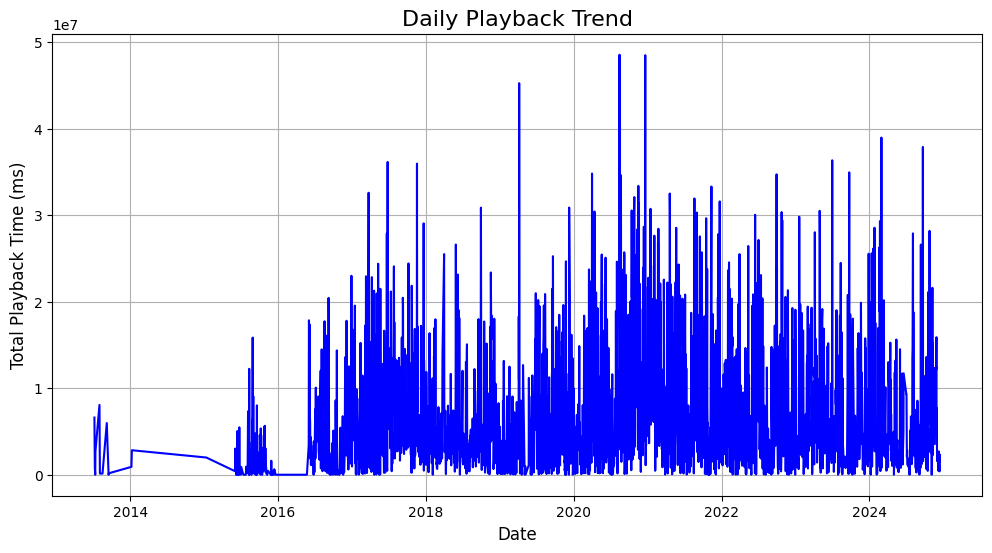

In [ ]:
# Visualization 1: Daily Playback Trend
daily_playback = spotify_data.groupby('date')['ms_played'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_playback['date'], daily_playback['ms_played'], color='blue')
plt.title('Daily Playback Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Playback Time (ms)', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-13-15ef36339242>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tracks, y='track_name', x='ms_played', palette='viridis')


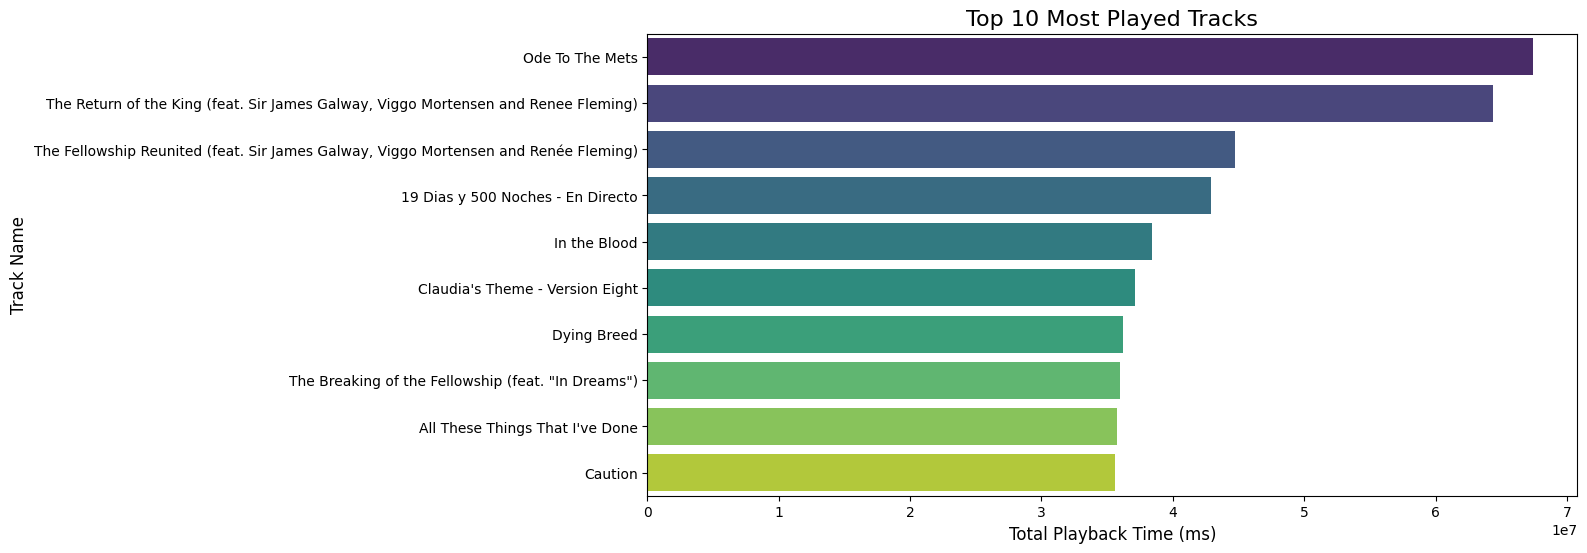

In [ ]:
# Visualization 2: Top 10 Most Played Tracks
top_tracks = spotify_data.groupby('track_name')['ms_played'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_tracks, y='track_name', x='ms_played', palette='viridis')
plt.title('Top 10 Most Played Tracks', fontsize=16)
plt.xlabel('Total Playback Time (ms)', fontsize=12)
plt.ylabel('Track Name', fontsize=12)
plt.show()

<ipython-input-14-4b7c4d337e1f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, y='artist_name', x='ms_played', palette='coolwarm')


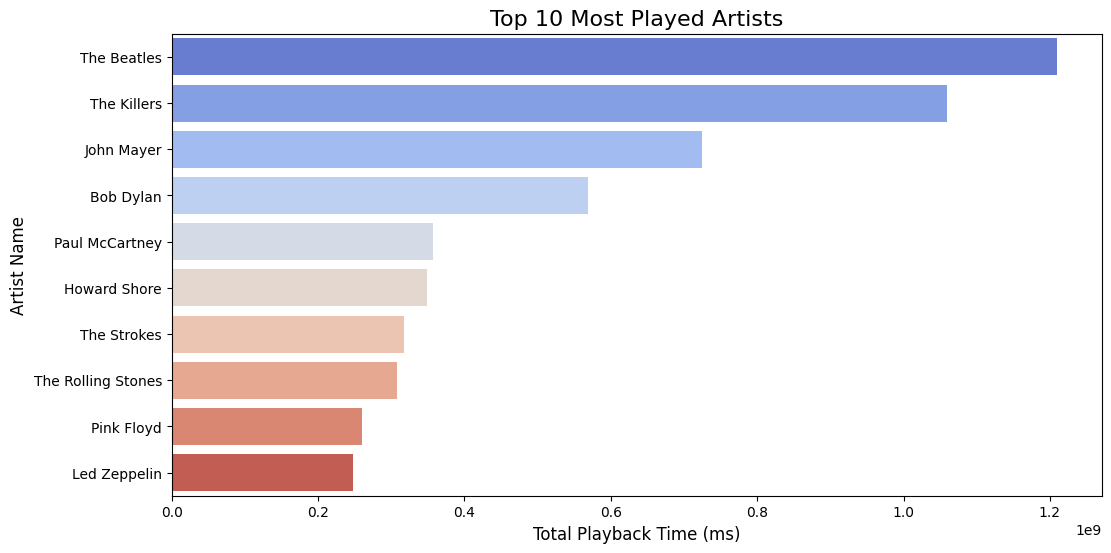

In [ ]:
# Visualization 3: Top 10 Most Played Artists
top_artists = spotify_data.groupby('artist_name')['ms_played'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists, y='artist_name', x='ms_played', palette='coolwarm')
plt.title('Top 10 Most Played Artists', fontsize=16)
plt.xlabel('Total Playback Time (ms)', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)
plt.show()

<ipython-input-15-72875bb5873c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x='quarter', y='ms_played', palette='pastel')


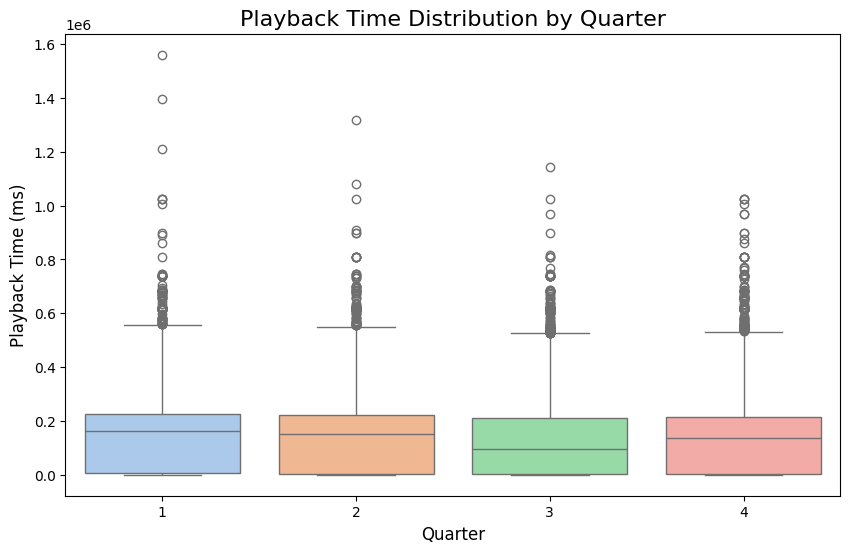

In [ ]:

# Visualization 4: Playback Time Distribution by Quarter

# Create a 'quarter' column
spotify_data['quarter'] = spotify_data['ts'].dt.quarter

plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify_data, x='quarter', y='ms_played', palette='pastel')
plt.title('Playback Time Distribution by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Playback Time (ms)', fontsize=12)
plt.show()

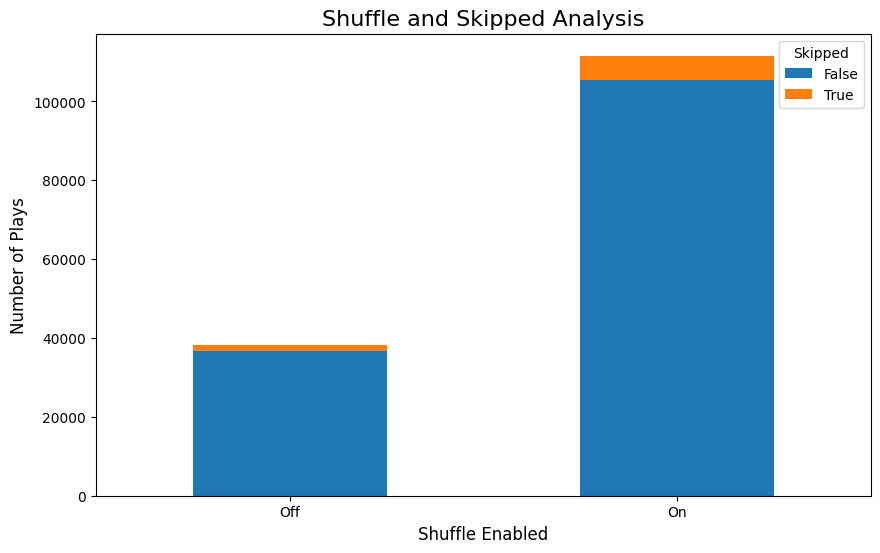

In [ ]:
# Visualization 5: Shuffle and Skipped Analysis
shuffle_skipped = spotify_data.groupby(['shuffle', 'skipped']).size().unstack()
shuffle_skipped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Shuffle and Skipped Analysis', fontsize=16)
plt.xlabel('Shuffle Enabled', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Off', 'On'], rotation=0)
plt.legend(title='Skipped')
plt.show()

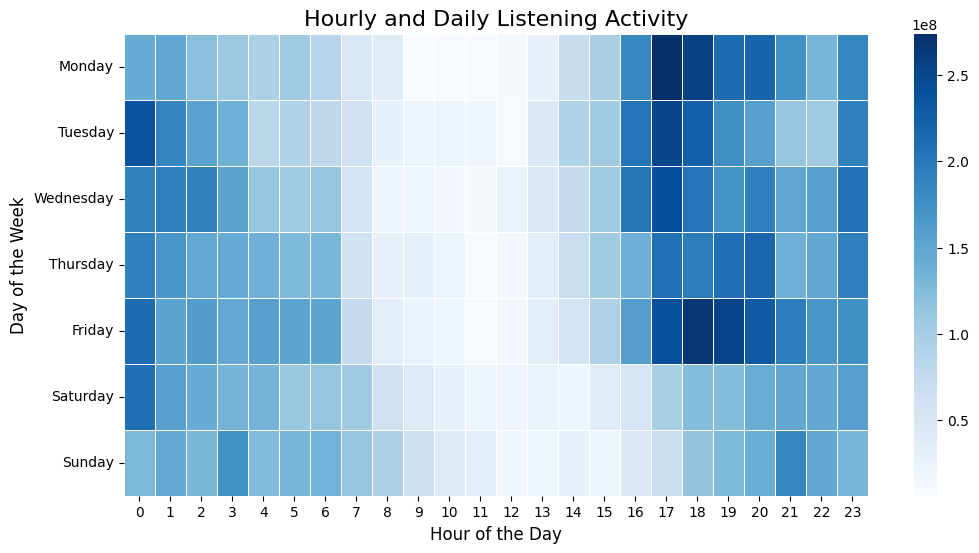

In [ ]:
# Extract hour and day-of-week from timestamp
spotify_data['hour'] = spotify_data['ts'].dt.hour
spotify_data['day_of_week'] = spotify_data['ts'].dt.day_name()

# Aggregate playback time by hour and day
heatmap_data = spotify_data.groupby(['day_of_week', 'hour'])['ms_played'].sum().unstack()

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5)
plt.title('Hourly and Daily Listening Activity', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.show()


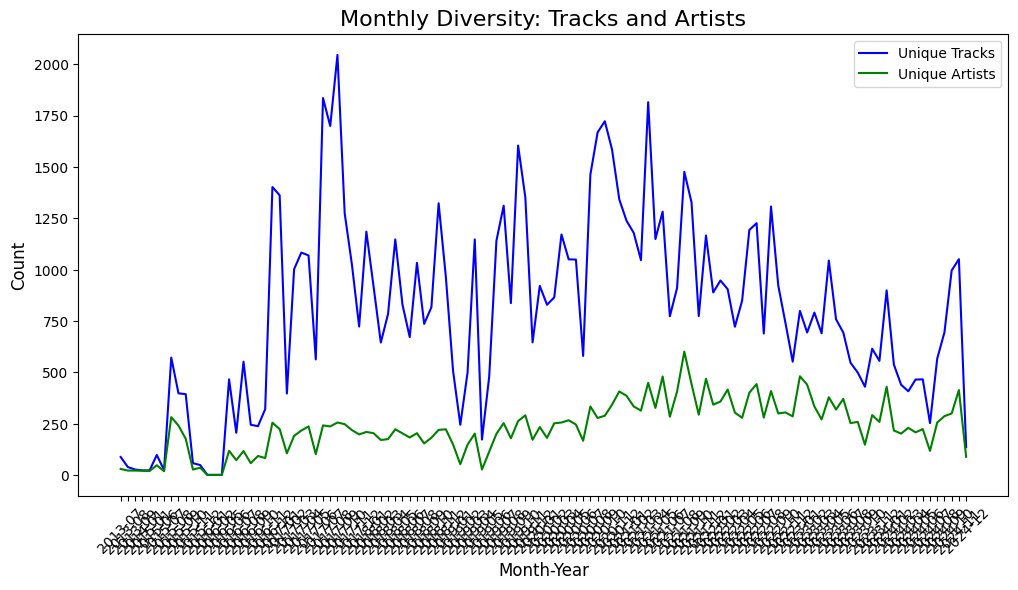

In [ ]:
# Extract month and year from timestamp
spotify_data['month_year'] = spotify_data['ts'].dt.to_period('M')

# Count unique tracks and artists per month
monthly_diversity = spotify_data.groupby('month_year').agg(
    unique_tracks=('track_name', 'nunique'),
    unique_artists=('artist_name', 'nunique')
).reset_index()

# Plot diversity trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_diversity['month_year'].astype(str), monthly_diversity['unique_tracks'], label='Unique Tracks', color='blue')
plt.plot(monthly_diversity['month_year'].astype(str), monthly_diversity['unique_artists'], label='Unique Artists', color='green')
plt.title('Monthly Diversity: Tracks and Artists', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()


<ipython-input-19-e2ccdbd58d46>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_skip_rate, x='skip_rate', y=artist_skip_rate.index, palette='Reds_r')


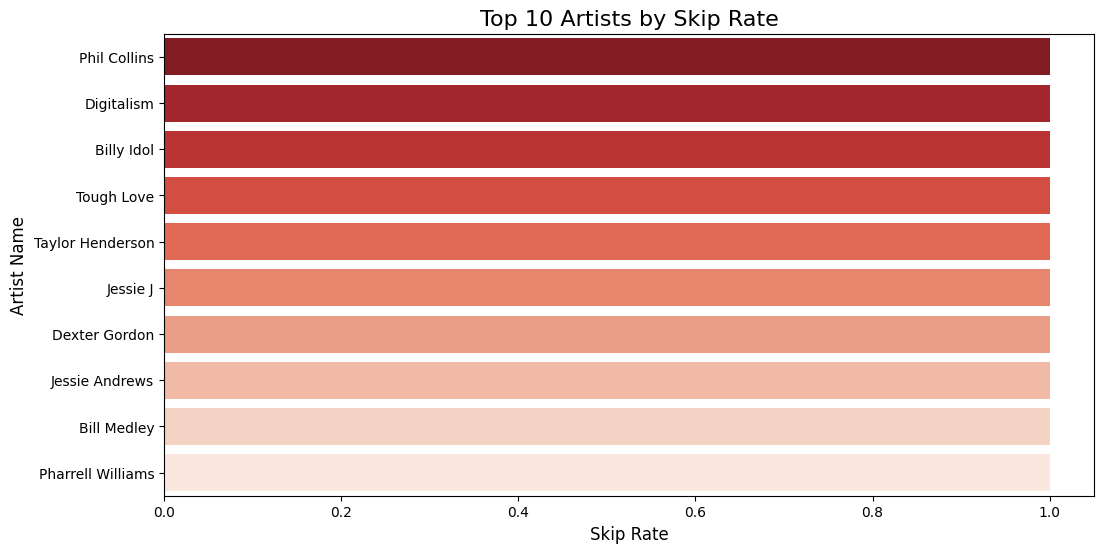

In [ ]:
# Calculate skip rate for each artist
artist_skip_rate = spotify_data.groupby('artist_name').agg(
    total_tracks=('skipped', 'size'),
    skipped_tracks=('skipped', 'sum')
)
artist_skip_rate['skip_rate'] = artist_skip_rate['skipped_tracks'] / artist_skip_rate['total_tracks']
artist_skip_rate = artist_skip_rate.sort_values(by='skip_rate', ascending=False).head(10)

# Plot top skipped artists
plt.figure(figsize=(12, 6))
sns.barplot(data=artist_skip_rate, x='skip_rate', y=artist_skip_rate.index, palette='Reds_r')
plt.title('Top 10 Artists by Skip Rate', fontsize=16)
plt.xlabel('Skip Rate', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Prepare features and target
features = spotify_data[['ms_played', 'shuffle', 'quarter']].copy()
features['shuffle'] = features['shuffle'].astype(int)
target = spotify_data['skipped'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9456826371279862
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28344
           1       0.00      0.00      0.00      1628

    accuracy                           0.95     29972
   macro avg       0.47      0.50      0.49     29972
weighted avg       0.89      0.95      0.92     29972



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
import plotly.express as px

# Interactive playback trends
fig = px.line(daily_playback, x='date', y='ms_played', title='Daily Playback Trend', labels={'ms_played': 'Playback Time (ms)'})
fig.show()

# Interactive top artists
fig = px.bar(top_artists, x='ms_played', y='artist_name', orientation='h', title='Top 10 Artists by Playback Time', labels={'ms_played': 'Playback Time (ms)', 'artist_name': 'Artist'})
fig.show()


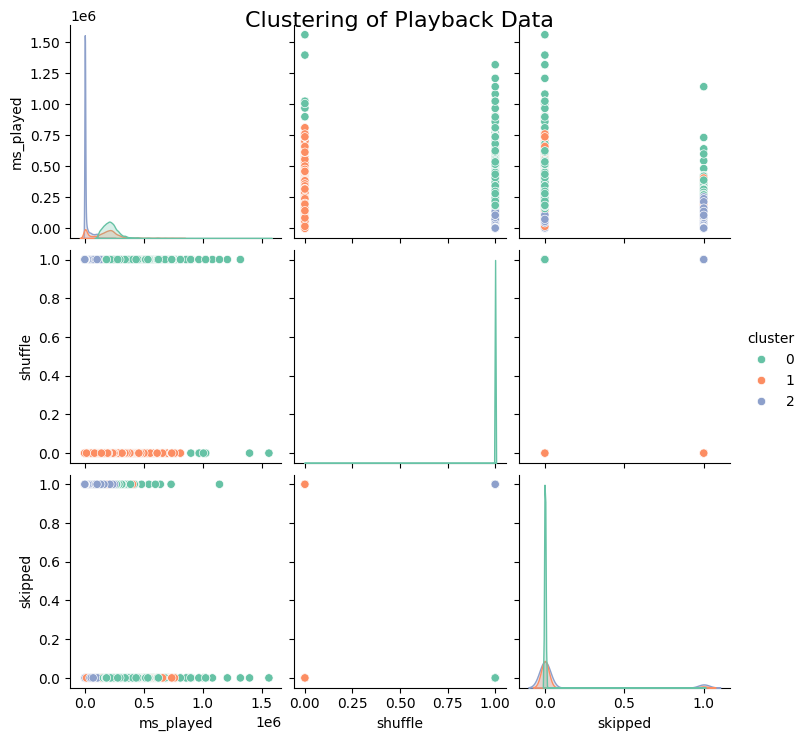

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features for clustering
cluster_features = spotify_data[['ms_played', 'shuffle', 'skipped']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to dataset
spotify_data['cluster'] = cluster_labels

# Visualize clusters
sns.pairplot(spotify_data, vars=['ms_played', 'shuffle', 'skipped'], hue='cluster', palette='Set2')
plt.suptitle('Clustering of Playback Data', fontsize=16)
plt.show()


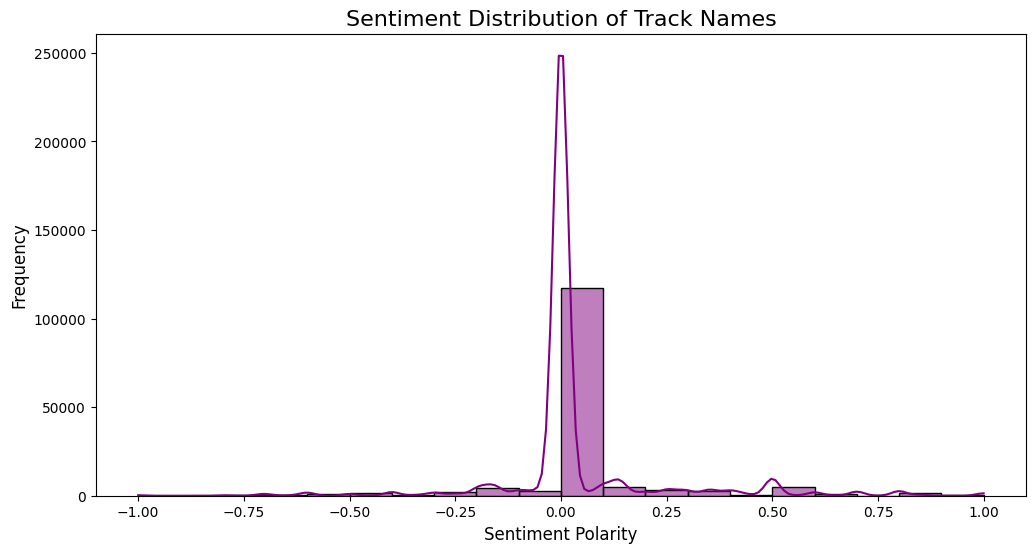

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity for track names
spotify_data['track_sentiment'] = spotify_data['track_name'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(spotify_data['track_sentiment'], bins=20, kde=True, color='purple')
plt.title('Sentiment Distribution of Track Names', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [ ]:
# Top 5 Artists
top_artists = spotify_data.groupby('artist_name')['ms_played'].sum().nlargest(5)
print("Top 5 Artists:")
print(top_artists)

# Top 5 Tracks
top_tracks = spotify_data.groupby('track_name')['ms_played'].sum().nlargest(5)
print("\nTop 5 Tracks:")
print(top_tracks)

# Top 5 Albums
top_albums = spotify_data.groupby('album_name')['ms_played'].sum().nlargest(5)
print("\nTop 5 Albums:")
print(top_albums)


Top 5 Artists:
artist_name
The Beatles       1210184552
The Killers       1059556516
John Mayer         725219443
Bob Dylan          569456396
Paul McCartney     357354370
Name: ms_played, dtype: int64

Top 5 Tracks:
track_name
Ode To The Mets                                                                        67431580
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756730
19 Dias y 500 Noches - En Directo                                                      42914042
In the Blood                                                                           38427087
Name: ms_played, dtype: int64

Top 5 Albums:
album_name
The New Abnormal        186757895
The Beatles             186649296
Imploding The Mirage    159923361
Abbey Road              148620310
Blood On The Tracks     147889025
Name: ms_played, dtype: int64


In [ ]:
total_playback_time = spotify_data['ms_played'].sum() / (1000 * 60 * 60)  # Convert ms to hours
print(f"\nTotal Playback Time: {total_playback_time:.2f} hours")



Total Playback Time: 5341.54 hours


Session Analysis Summary:
                       session_start                    session_end  \
count                           8881                           8881   
mean   2020-02-15 00:04:10.438463744  2020-02-15 00:42:35.641144064   
min              2013-07-08 02:44:34            2013-07-08 05:47:24   
25%              2018-01-13 10:41:26            2018-01-13 10:41:26   
50%              2020-02-20 23:37:16            2020-02-21 01:55:10   
75%              2022-01-16 19:37:16            2022-01-16 20:00:27   
max              2024-12-15 22:51:33            2024-12-15 23:06:25   
std                              NaN                            NaN   

       tracks_played  total_play_time  
count    8881.000000      8881.000000  
mean       16.874226        36.087398  
min         1.000000         0.000000  
25%         2.000000         4.082917  
50%         7.000000        14.401367  
75%        19.000000        36.846300  
max      1123.000000       763.265483  
std        30.

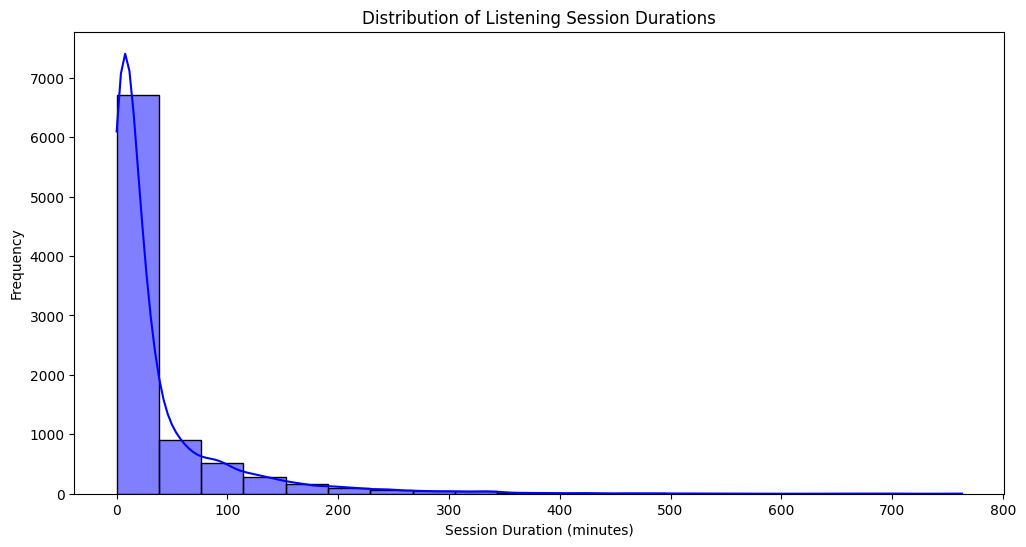

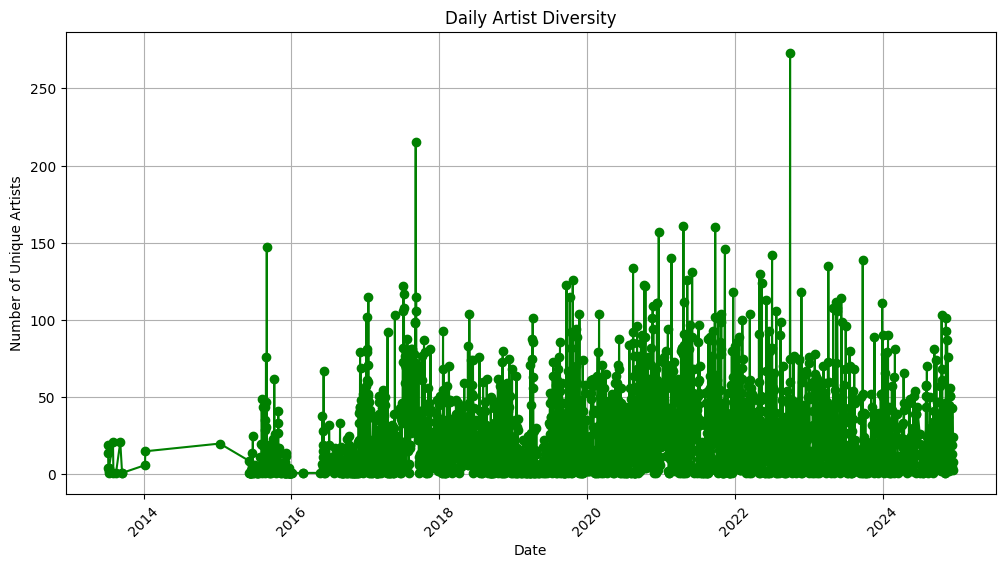

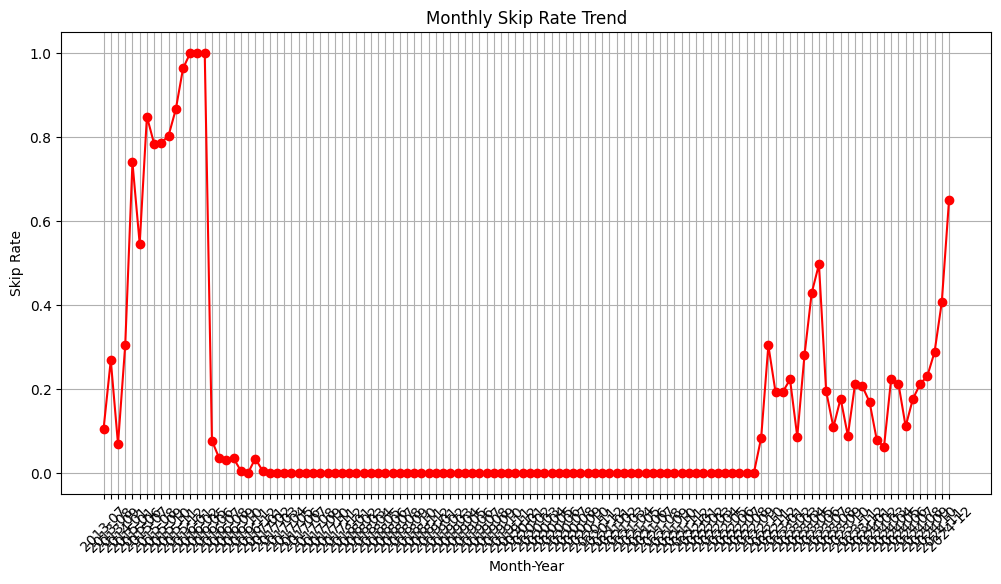

<ipython-input-26-c5216d94044e>:70: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




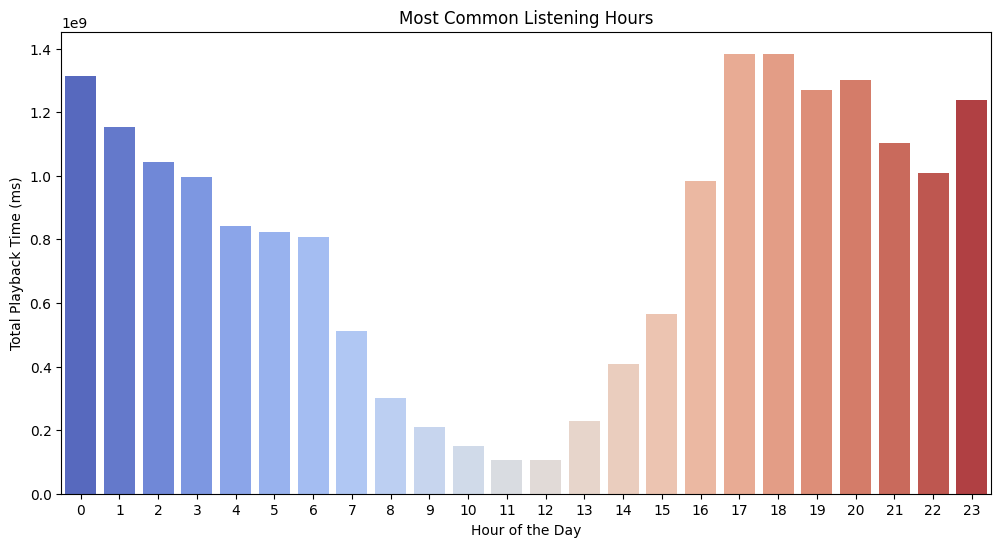

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Session Analysis ==========
# Define session: a new session starts if the gap between two tracks is > 30 minutes
spotify_data['prev_ts'] = spotify_data['ts'].shift(1)
spotify_data['session_gap'] = (spotify_data['ts'] - spotify_data['prev_ts']).dt.total_seconds() / 60
spotify_data['new_session'] = spotify_data['session_gap'] > 30
spotify_data['session_id'] = spotify_data['new_session'].cumsum()

# Calculate session statistics
session_stats = spotify_data.groupby('session_id').agg(
    session_start=('ts', 'min'),
    session_end=('ts', 'max'),
    tracks_played=('track_name', 'count'),
    total_play_time=('ms_played', 'sum')
)

# Convert playback time from milliseconds to minutes
session_stats['total_play_time'] = session_stats['total_play_time'] / (1000 * 60)

print("Session Analysis Summary:")
print(session_stats.describe())

# Plot distribution of session duration
plt.figure(figsize=(12, 6))
sns.histplot(session_stats['total_play_time'], bins=20, kde=True, color='blue')
plt.title('Distribution of Listening Session Durations')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# ========== 2. Artist Diversity Over Time ==========
daily_artist_diversity = spotify_data.groupby('date')['artist_name'].nunique().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_artist_diversity['date'], daily_artist_diversity['artist_name'], marker='o', linestyle='-', color='green')
plt.title('Daily Artist Diversity')
plt.xlabel('Date')
plt.ylabel('Number of Unique Artists')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ========== 3. Skip Rate Over Time ==========
spotify_data['month_year'] = spotify_data['ts'].dt.to_period('M')

monthly_skip_rate = spotify_data.groupby('month_year').agg(
    total_tracks=('skipped', 'size'),
    skipped_tracks=('skipped', 'sum')
)

monthly_skip_rate['skip_rate'] = monthly_skip_rate['skipped_tracks'] / monthly_skip_rate['total_tracks']

plt.figure(figsize=(12, 6))
plt.plot(monthly_skip_rate.index.astype(str), monthly_skip_rate['skip_rate'], marker='o', linestyle='-', color='red')
plt.title('Monthly Skip Rate Trend')
plt.xlabel('Month-Year')
plt.ylabel('Skip Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ========== 4. Most Common Listening Hours ==========
hourly_playback = spotify_data.groupby('hour')['ms_played'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_playback, x='hour', y='ms_played', palette='coolwarm')
plt.title('Most Common Listening Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Playback Time (ms)')
plt.xticks(range(0, 24))
plt.show()
